## IMPORTING RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as sm
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

## READING THE DATASET

In [2]:
FS=pd.read_csv('dataFS.csv')

In [3]:
FS.head(5)

,ID,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,766,viwandani,primary,18.0,female,Other,6,1,yes,middle,fourth,0,Secure
1,6540,viwandani,primary,31.0,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,9327,viwandani,primary,45.0,male,Other,1,0,no_(2),highest,fourth,0,Secure
3,9563,viwandani,secondary,18.0,male,Other,1,0,no_(2),middle,second,1,Moderately insecure
4,9631,korogocho,secondary,58.0,male,Other,2,1,no_(2),highest,fourth,0,Secure


## DATA PREPROCESSING

In [4]:
fsdata=FS.copy()

In [5]:
fsdata.head()

,ID,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,766,viwandani,primary,18.0,female,Other,6,1,yes,middle,fourth,0,Secure
1,6540,viwandani,primary,31.0,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,9327,viwandani,primary,45.0,male,Other,1,0,no_(2),highest,fourth,0,Secure
3,9563,viwandani,secondary,18.0,male,Other,1,0,no_(2),middle,second,1,Moderately insecure
4,9631,korogocho,secondary,58.0,male,Other,2,1,no_(2),highest,fourth,0,Secure


## SPECIFYING RELEVANT VARIABLES

 We remove ID since it is of no use for our analysis

In [6]:
data=fsdata.drop(['ID'],axis=1)

In [7]:
data.head(5)

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,viwandani,primary,18.0,female,Other,6,1,yes,middle,fourth,0,Secure
1,viwandani,primary,31.0,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,viwandani,primary,45.0,male,Other,1,0,no_(2),highest,fourth,0,Secure
3,viwandani,secondary,18.0,male,Other,1,0,no_(2),middle,second,1,Moderately insecure
4,korogocho,secondary,58.0,male,Other,2,1,no_(2),highest,fourth,0,Secure


# DEALING WITH MISSING VALUES

In [8]:
#checking for missing values
data.isnull().sum()

site         0
hhedu       17
hhhage       5
hhhsex       0
hhethnic     5
hhsize       0
u05          0
povline      5
windex3      0
windex5      0
FS_score     0
FS           4
dtype: int64

In [9]:
d=data.isna().mean().round(4)*100
d

site        0.00
hhedu       0.15
hhhage      0.05
hhhsex      0.00
hhethnic    0.05
hhsize      0.00
u05         0.00
povline     0.05
windex3     0.00
windex5     0.00
FS_score    0.00
FS          0.04
dtype: float64

COMMENT

hhedu has 0.15% of its values missing\
hhhage has 0.05% of its values missing\
hhethnic has 0.05% of its values missing\
povline has 0.05% of its values missing\
FS has 0.04% of its values missing

In [10]:
d.sum()          # Total  percentage of missing values in our data

0.34

Since the missing values constitute an insignificant proportion of data, we simply drop them

In [11]:
#dropping all missing values
data=data.dropna(axis=0,how='any')

In [12]:
data.isna().sum()

site        0
hhedu       0
hhhage      0
hhhsex      0
hhethnic    0
hhsize      0
u05         0
povline     0
windex3     0
windex5     0
FS_score    0
FS          0
dtype: int64

# Changing column names

In [13]:
data.columns

Index(['site', 'hhedu', 'hhhage', 'hhhsex', 'hhethnic', 'hhsize', 'u05',
       'povline', 'windex3', 'windex5', 'FS_score', 'FS'],
      dtype='object')

In [14]:
# chacking the number of rows and columns
data.shape

(10956, 12)

# TRANSFORMING CERTAIN VARIABLES

hhhage which is the age of the head of the household, was given as a float. Age should be an integer

In [15]:
data=data.astype({'hhhage':'int64'})
data.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0,Secure
1,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,viwandani,primary,45,male,Other,1,0,no_(2),highest,fourth,0,Secure
3,viwandani,secondary,18,male,Other,1,0,no_(2),middle,second,1,Moderately insecure
4,korogocho,secondary,58,male,Other,2,1,no_(2),highest,fourth,0,Secure


In [16]:
data['povline'] = data['povline'].replace('no_(2)', 'no')

In [17]:
data.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,viwandani,primary,18,female,Other,6,1,yes,middle,fourth,0,Secure
1,viwandani,primary,31,male,Other,1,0,yes,lowest,lowest,3,Severely insecure
2,viwandani,primary,45,male,Other,1,0,no,highest,fourth,0,Secure
3,viwandani,secondary,18,male,Other,1,0,no,middle,second,1,Moderately insecure
4,korogocho,secondary,58,male,Other,2,1,no,highest,fourth,0,Secure


## PRELIMINARY EXPLORATORY ANALYSIS

In [18]:
data.describe().hhhage

count    10956.000000
mean        38.098941
std         12.303179
min         18.000000
25%         29.000000
50%         36.000000
75%         45.000000
max        100.000000
Name: hhhage, dtype: float64

Comment

The average age of a household head is 38.096\
The minimum age of a household head is 18\
The maximum age of a household head is 100


SEX OF HEAD OF HOUSEHOLD

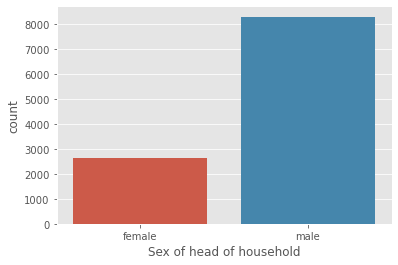

In [19]:
# visualising the number of observations for each category in a variable
axes=sns.countplot(data['hhhsex'])
axes.set_xlabel('Sex of head of household')
plt.show()

In [20]:
# count the number of occurrences of 'male' in the 'hhhsex' column
count_male = data['hhhsex'].value_counts()['male']

# divide by the total number of rows in the column
total_rows = len(data)
percentage_male = (count_male / total_rows)*100
percentage_male

75.86710478276744

Comment

Majority of the household heads are male\
Specifically 75.87%

POVERTY LINE

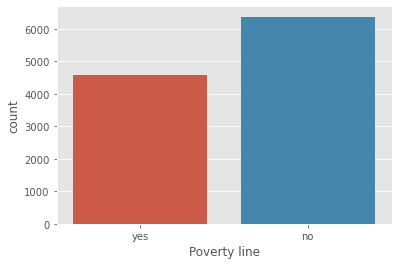

In [21]:
axes=sns.countplot(data['povline'])
axes.set_xlabel('Poverty line')

plt.show()


Comment

Most households are above the poverty line


# EXPLORATORY ANALYSIS TAKING INTO COSIDERATION OUR TARGET

FOOD SECURITY AND POVERTY LINE

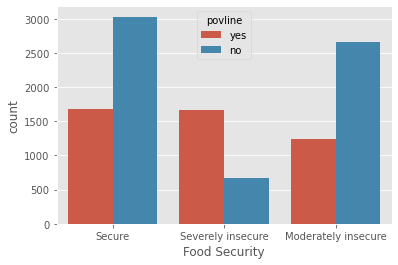

In [22]:
axes=sns.countplot(data=data, x='FS',hue='povline')
axes.set_xlabel('Food Security')

plt.show()


Comment

Most households above the poverty line have a higher food security\
And most households below the poverty line have severe issues with food security

EDUCATIONAL LEVEL AND WEALTH TERTILE

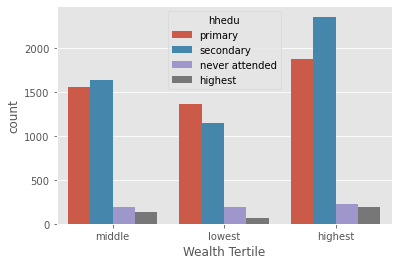

In [23]:
axes=sns.countplot(data=data, x='windex3',hue='hhedu')
axes.set_xlabel('Wealth Tertile')

plt.show()


Comment

Most people with high wealth tend to have attained secondary level education\

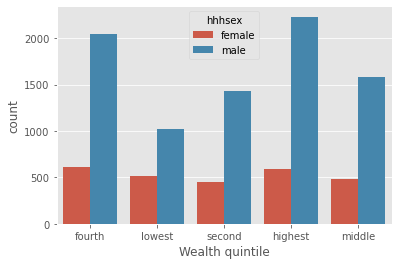

In [24]:
axes=sns.countplot(data=data, x='windex5',hue='hhhsex')
axes.set_xlabel('Wealth quintile')

plt.show()

FOOD SECURITY AND WEALTH


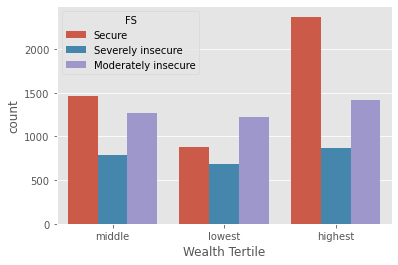

In [25]:
axes=sns.countplot(data=data, x='windex3',hue='FS')
axes.set_xlabel('Wealth Tertile')

plt.show()

Comment

Most people who have their food secured are those with a higher wealth level

FOOD SECURITY AND HOUSEHOLD SIZE

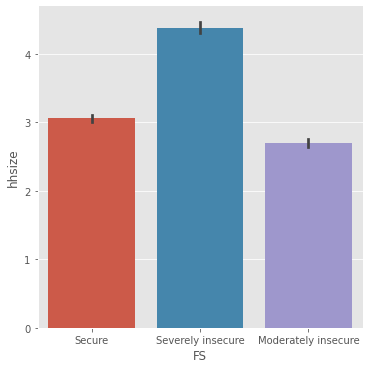

In [26]:
axes=sns.catplot(x='FS', y='hhsize', kind='bar', data=data)

#axes.set_xlabel('House size')

plt.show()

Comment

The greater the household size, the higher the level of food insecurity

FOOD SECURITY AND EDUCATIONAL LEVEL

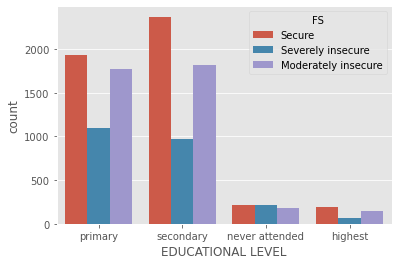

In [27]:
axes=sns.countplot(data=data, x='hhedu',hue='FS')
axes.set_xlabel('EDUCATIONAL LEVEL')

plt.show()

Comment

On average those with primary and those with secondary education have a high food security

FOOD SECURITY AND SITE

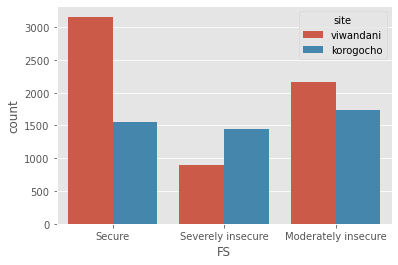

In [28]:
axes=sns.countplot(data=data, x='FS',hue='site')
axes.set_xlabel('FS')

plt.show()

Comment

Those in viwandani have a higher food security than those in korogocho on average

In [29]:
data.groupby(['site'])['hhsize'].mean()

site
korogocho    3.686536
viwandani    2.851888
Name: hhsize, dtype: float64

In [30]:
data.groupby(['site'])['u05'].sum()

site
korogocho    2253
viwandani    2400
Name: u05, dtype: int64

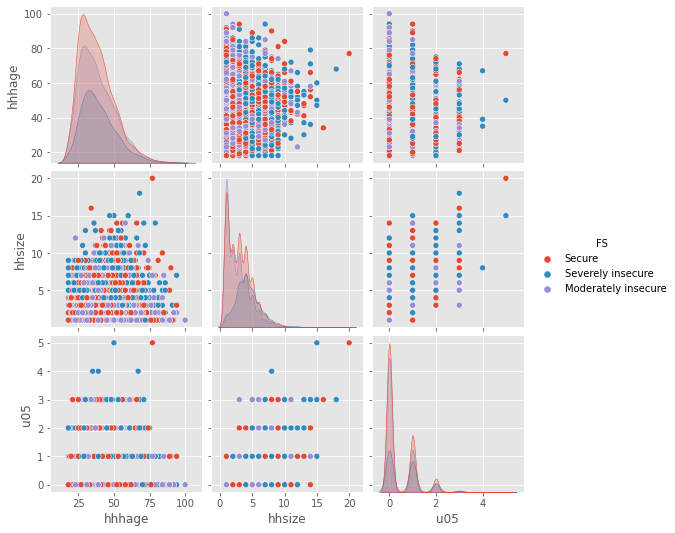

In [31]:
sns.pairplot(data,x_vars=['hhhage', 'hhsize','u05'],y_vars=['hhhage', 'hhsize','u05'],hue='FS')
plt.show()

In [32]:
# checking if a household headed by male is secured compared to female  
data.groupby(['hhhsex'])['FS_score'].value_counts()

hhhsex  FS_score
female  0            991
        3            787
        2            536
        1            310
        4             20
male    0           3724
        2           2077
        3           1511
        1            981
        4             19
Name: FS_score, dtype: int64

In [33]:
#from here it clearly shows that households with level of education primary were more secured.
# access to quality food do not depend on the highest education level of individuals in the various househoulds
data.groupby(['hhedu'])['FS_score'].value_counts()

hhedu           FS_score
highest         0            197
                2             98
                3             61
                1             45
never attended  0            211
                3            205
                2            108
                1             72
                4              5
primary         0           1937
                2           1115
                3           1082
                1            651
                4             18
secondary       0           2370
                2           1292
                3            950
                1            523
                4             16
Name: FS_score, dtype: int64

In [34]:
# here we could see that households owning more assets or who are wealthy have access to quality food that the rest
data.groupby(['windex5'])['FS_score'].value_counts()

windex5  FS_score
fourth   0           1172
         3            593
         2            576
         1            307
         4              3
highest  0           1555
         3            482
         2            428
         1            356
lowest   2            531
         0            464
         3            373
         1            155
         4             17
middle   0            816
         2            527
         3            462
         1            246
         4              9
second   0            708
         2            551
         3            388
         1            227
         4             10
Name: FS_score, dtype: int64

Viewing Categorical Features

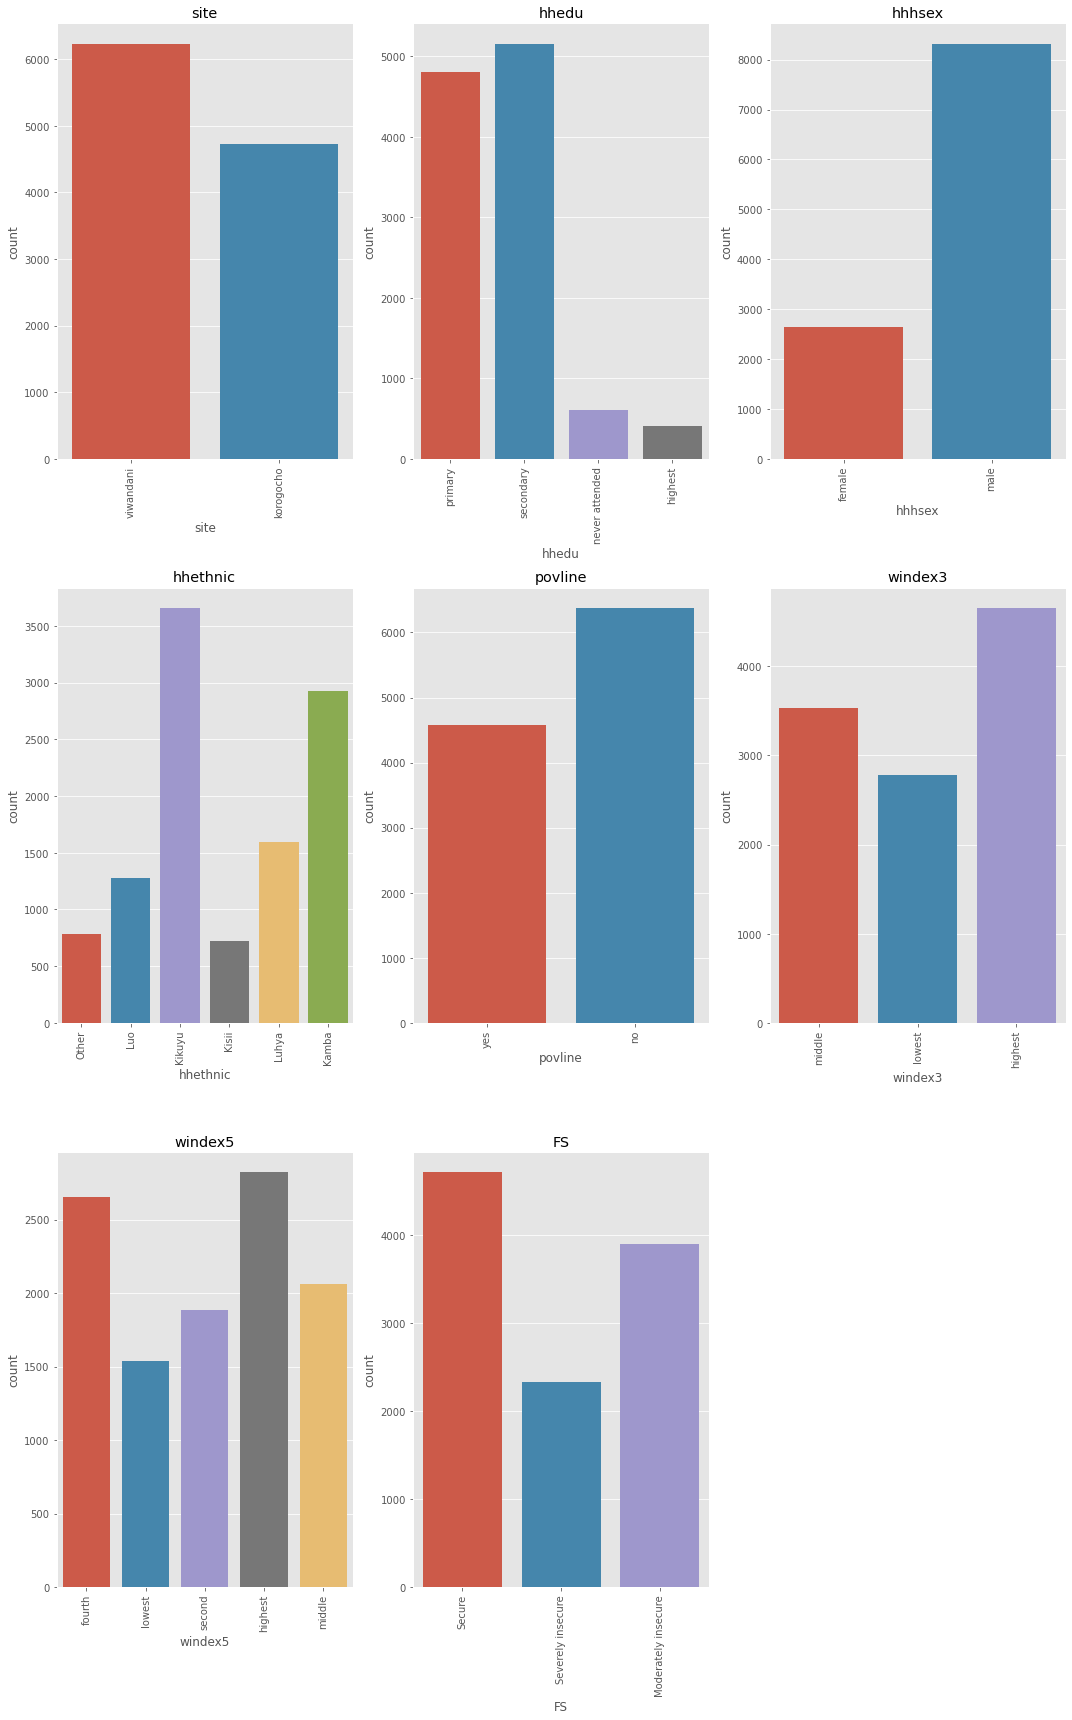

In [35]:
#Get names of all categorical feature

cat=data.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots

num_cols=len(cat)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(nrows=num_rows,ncols=3,figsize=(15,8*num_rows))
axes=axes.flatten()

# Create a countplot for the top 6  values 
for i, var in enumerate(cat):
    top_values=data[var].value_counts().nlargest(6).index
    filtered_data=data[data[var].isin(top_values)]
    sns.countplot(x=var,data=filtered_data,ax=axes[i])
    axes[i].set_title(var)
    axes[i].tick_params(axis='x',rotation=90)
    
# Remove any extra empty subplots if needed
if num_cols < len(axes):
    for i in range(num_cols,len(axes)):
        fig.delaxes(axes[i])
        
# Adjust spacing  between subplots
fig.tight_layout()

# Show plot
plt.show()

## Processing Data for Machine learning

In [36]:
## converting categorical variables into binary
from sklearn import preprocessing
for col in data.select_dtypes(include=['object']).columns:
    print(f'{col}:{data[col].unique()}')


site:['viwandani' 'korogocho']
hhedu:['primary' 'secondary' 'never attended' 'highest']
hhhsex:['female' 'male']
hhethnic:['Other' 'Luo' 'Kikuyu' 'Kisii' 'Luhya' 'Kamba']
povline:['yes' 'no']
windex3:['middle' 'lowest' 'highest']
windex5:['fourth' 'lowest' 'second' 'highest' 'middle']
FS:['Secure' 'Severely insecure' 'Moderately insecure']


In [37]:
for col in data.select_dtypes(include=['object']).columns:
    
    label_encoder=preprocessing.LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])
    
    print(f'{col}: {data[col].unique()}')

site: [1 0]
hhedu: [2 3 1 0]
hhhsex: [0 1]
hhethnic: [5 4 1 2 3 0]
povline: [1 0]
windex3: [2 1 0]
windex5: [0 2 4 1 3]
FS: [1 2 0]


In [38]:
data.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5,FS_score,FS
0,1,2,18,0,5,6,1,1,2,0,0,1
1,1,2,31,1,5,1,0,1,1,2,3,2
2,1,2,45,1,5,1,0,0,0,0,0,1
3,1,3,18,1,5,1,0,0,2,4,1,0
4,0,3,58,1,5,2,1,0,0,0,0,1


# Correlation

<AxesSubplot:>

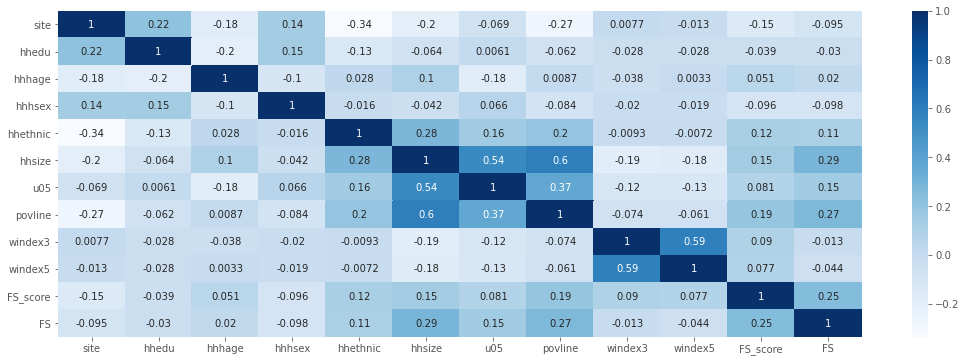

In [39]:
correlation=data.corr()
plt.figure(figsize=(18,6))
sns.heatmap(correlation,annot=True,cmap='Blues')


## Machine learning model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=data.drop(['FS','FS_score'],axis=1)
X.head()

,site,hhedu,hhhage,hhhsex,hhethnic,hhsize,u05,povline,windex3,windex5
0,1,2,18,0,5,6,1,1,2,0
1,1,2,31,1,5,1,0,1,1,2
2,1,2,45,1,5,1,0,0,0,0
3,1,3,18,1,5,1,0,0,2,4
4,0,3,58,1,5,2,1,0,0,0


In [42]:
Y=data['FS']
Y.head()

0    1
1    2
2    1
3    0
4    1
Name: FS, dtype: int32

## Training Dataset

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state=42 )

# Decision Tree Regressor

Tuning

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import load_boston

dtree=DecisionTreeRegressor()

param_grid={'max_depth':[2,4,6,8],
            'min_samples_split':[2,4,6,8],
            'min_samples_leaf':[1,2,3,4],
            'max_features':['auto','sqrt','log2'],
            'random_state':[0,42]
    
}

# Create a GridSearchCV object
grid_search= GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(X_train,Y_train)

print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 0}


In [46]:
dtree=DecisionTreeRegressor(random_state=0,max_features='sqrt',max_depth=6,min_samples_split=8,min_samples_leaf=1)
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_split=8,
                      random_state=0)

Evaluation

In [47]:
pr=dtree.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import math

mae=metrics.mean_absolute_error(Y_test,pr)
mape=mean_absolute_percentage_error(Y_test,pr)
mse=metrics.mean_squared_error(Y_test,pr)
r2=metrics.r2_score(Y_test,pr)
rmse=math.sqrt(mse)

In [49]:
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 0.5868385452729628
MAPE is 1233048027622934.5
MSE is 0.487415634389686
R2 score is 0.10778583091564753
RMSE score is 0.6981515841059777


# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [51]:
model = RandomForestClassifier(n_estimators=100,max_depth=7)


In [52]:
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7)

In [53]:
Y_pred=model.predict(X_test)


## Model Evaluation

In [54]:
from sklearn import metrics

In [55]:
print('Accuracy',metrics.accuracy_score(Y_test,Y_pred))

Accuracy 0.5123175182481752


In [56]:
cm=metrics.confusion_matrix(Y_test,Y_pred)

<AxesSubplot:>

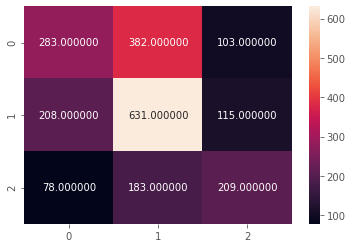

In [57]:
sns.heatmap(cm,annot=True,fmt='4f')

# Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
PRED=pd.DataFrame(confusion_matrix(Y_test, Y_pred))
PRED.columns=['Predicted 0 (Moderately insecure)','Predicted 1(secure)','Predicted 2(severely insecure)']
PRED=PRED.rename(index={0:'Actual 0 (Moderately insecure)',1:'Actual 1(secure) ',2:'Actual 2 (severely insecure)'})
PRED

,Predicted 0 (Moderately insecure),Predicted 1(secure),Predicted 2(severely insecure)
Actual 0 (Moderately insecure),283,382,103
Actual 1(secure),208,631,115
Actual 2 (severely insecure),78,183,209


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.37      0.42       768
           1       0.53      0.66      0.59       954
           2       0.49      0.44      0.47       470

    accuracy                           0.51      2192
   macro avg       0.50      0.49      0.49      2192
weighted avg       0.51      0.51      0.50      2192



# ORDINAL REGRESSION

In [61]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [62]:
mod_prob = OrderedModel(Y_train,X_train,distr='logit')
 
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.007098
         Iterations: 40
         Function evaluations: 43
         Gradient evaluations: 43


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                     FS   Log-Likelihood:                -8826.2
Model:                   OrderedModel   AIC:                         1.768e+04
Method:            Maximum Likelihood   BIC:                         1.776e+04
Date:                Sat, 09 Sep 2023                                         
Time:                        08:29:56                                         
No. Observations:                8764                                         
Df Residuals:                    8752                                         
Df Model:                          12                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
site           0.0387      0.046      0.837      0.402      -0.052       0.129
hhedu          0.0324      0.028      1.160      0.246      -0.022       0.087
hhhage        -0.0011      0.002     -0.602      0.547      -0.005       0.002
hhhsex        -0.3538      0.049     -7.199      0.000      -0.450      -0.258
hhethnic       0.0349      0.014      2.518      0.012       0.008       0.062
hhsize         0.2019      0.015     13.553      0.000       0.173       0.231
u05           -0.0532      0.039     -1.359      0.174      -0.130       0.023
povline        0.5524      0.053     10.389      0.000       0.448       0.657
windex3        0.1351      0.029      4.601      0.000       0.078       0.193
windex5       -0.0650      0.018     -3.671      0.000      -0.100      -0.030
0/1            0.0297      0.124      0.239      0.811      -0.214       0.273
1/2            0.7235      0.015     49.766      0.000       0.695       0.752
==============================================================================
"""

In [63]:
predicted = res_log.model.predict(res_log.params, exog=X_train)
predicted

array([[0.42165378, 0.42974751, 0.14859871],
       [0.18555648, 0.45608057, 0.35836295],
       [0.43624129, 0.42253842, 0.14122029],
       ...,
       [0.19185209, 0.45918521, 0.3489627 ],
       [0.47294278, 0.4028619 , 0.12419533],
       [0.2266784 , 0.47061865, 0.30270295]])

In [64]:
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions')
print((np.asarray(Y_train.values)== pred_choice).mean())

Fraction of correct choice predictions
0.43849840255591055


# XGBOOST Classifier

In [65]:
import xgboost as xgb
from xgboost import XGBClassifier

learn = XGBClassifier()
learn.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
pre = learn.predict(X_test)

In [67]:
print(classification_report(Y_test, pre))

              precision    recall  f1-score   support

           0       0.47      0.40      0.43       768
           1       0.52      0.61      0.57       954
           2       0.47      0.41      0.44       470

    accuracy                           0.50      2192
   macro avg       0.49      0.48      0.48      2192
weighted avg       0.49      0.50      0.49      2192



# SHAP

In [68]:
import shap

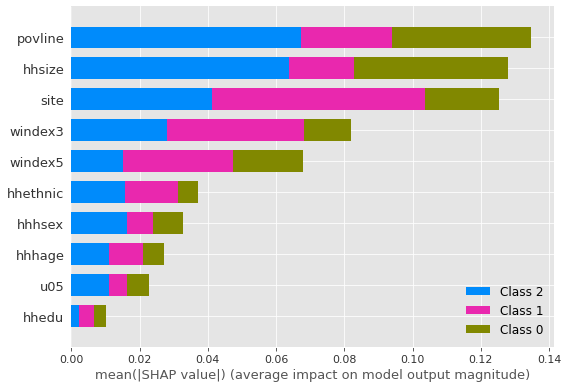

In [69]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)